# Homework Assignment 2

As we know billions of people around the world have been affected by the covid-19 pandemic this year, therefore accurate forecasting of the disease spread can act as planning tools for policymakers, clinicians, and public health practitioners in dealing with this crisis. In this notebook,we will try to do some forecasting on the covid-19 epidemic progression using python tools. We will use a sample data that is inspired from the COVID-19 Data Repository at John Hopkins university.


In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
from math import sqrt 
import sys

In [2]:
print (sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


First, let us load the data.

In [3]:
data_orig = pd.read_csv("us_covid_data.csv")
data = data_orig.copy()
print (data_orig.columns)
data_orig

Index(['Unnamed: 0', 'date', 'Country', 'hospitalized_with_symptom',
       'Intensive_care', 'Total_hospitalized', 'Home_Isolation',
       'Total_positive', 'Daily_change_in_positive_cases',
       'New_positive_cases', 'Recovered', 'Deaths', 'Total_cases',
       'People_tested'],
      dtype='object')


,Unnamed: 0,date,Country,hospitalized_with_symptom,Intensive_care,Total_hospitalized,Home_Isolation,Total_positive,Daily_change_in_positive_cases,New_positive_cases,Recovered,Deaths,Total_cases,People_tested
0,0,2020-02-24T18:00:00,US,101,26,127,94,221,0,221,1,7,229,4324
1,1,2020-02-25T18:00:00,US,114,35,150,162,311,90,93,1,10,322,8623
2,2,2020-02-26T18:00:00,US,128,36,164,221,385,74,78,3,12,400,9587
3,3,2020-02-27T18:00:00,US,248,56,304,284,588,203,250,45,17,650,12014
4,4,2020-02-28T18:00:00,US,345,64,409,412,821,233,238,46,21,888,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,201,2020-09-12T17:00:00,US,1951,182,2133,35370,37503,736,1501,213191,35603,286297,9745975
202,202,2020-09-13T17:00:00,US,2042,187,2229,36280,38509,1006,1458,213634,35610,287753,9818118
203,203,2020-09-14T17:00:00,US,2122,197,2319,36868,39187,678,1008,213950,35624,288761,9863427
204,204,2020-09-15T17:00:00,US,2222,201,2423,37289,39712,525,1229,214645,35633,289990,9943944


As we can see that our data has different ranges of values for every feature and this can cause bias in our model, so here we will normalize our data(ignoring the categorical variables) so that our data is scaled between 0 and 1.

In [4]:
data_list = data_orig.columns.values.tolist()
for i in data_list[-11:]:
    data[[i]]=(data_orig[i]-data_orig[i].min())/(data_orig[i].max()-data_orig[i].min())



In [5]:
data

,Unnamed: 0,date,Country,hospitalized_with_symptom,Intensive_care,Total_hospitalized,Home_Isolation,Total_positive,Daily_change_in_positive_cases,New_positive_cases,Recovered,Deaths,Total_cases,People_tested
0,0,2020-02-24T18:00:00,US,0.000000,0.000000,0.000000,0.000000,0.000000,0.590051,0.022071,0.000000,0.000000,0.000000,0.000000
1,1,2020-02-25T18:00:00,US,0.000450,0.002227,0.000700,0.000814,0.000833,0.597704,0.002315,0.000000,0.000084,0.000319,0.000428
2,2,2020-02-26T18:00:00,US,0.000934,0.002474,0.001125,0.001520,0.001518,0.596344,0.000000,0.000009,0.000140,0.000587,0.000524
3,3,2020-02-27T18:00:00,US,0.005085,0.007422,0.005384,0.002274,0.003397,0.607313,0.026547,0.000204,0.000281,0.001446,0.000766
4,4,2020-02-28T18:00:00,US,0.008440,0.009401,0.008577,0.003806,0.005554,0.609864,0.024695,0.000209,0.000393,0.002263,0.001133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,201,2020-09-12T17:00:00,US,0.063994,0.038595,0.061015,0.422174,0.345089,0.652636,0.219633,0.990365,0.998821,0.982333,0.970262
202,202,2020-09-13T17:00:00,US,0.067142,0.039832,0.063935,0.433064,0.354400,0.675595,0.212996,0.992423,0.999018,0.987332,0.977447
203,203,2020-09-14T17:00:00,US,0.069909,0.042306,0.066673,0.440101,0.360676,0.647704,0.143541,0.993891,0.999411,0.990794,0.981960
204,204,2020-09-15T17:00:00,US,0.073368,0.043295,0.069836,0.445140,0.365536,0.634694,0.177651,0.997120,0.999663,0.995014,0.989980


In [6]:
# change the date format

dates = data['date']
date_format = [pd.to_datetime(d) for d in dates]

Let's print all the columns in the data.

# Data Vizualization

**Task P1:** complete the following **three** visualization graphs that show the trend of the epidemic progression. Copy them to the solution file.

Graph 1: plot the total number of people tested for the entire period of the dataset. Your X axis will be the dates ("Dates") and Y-axis will be the total number of cases("People_tested") over the period of time.

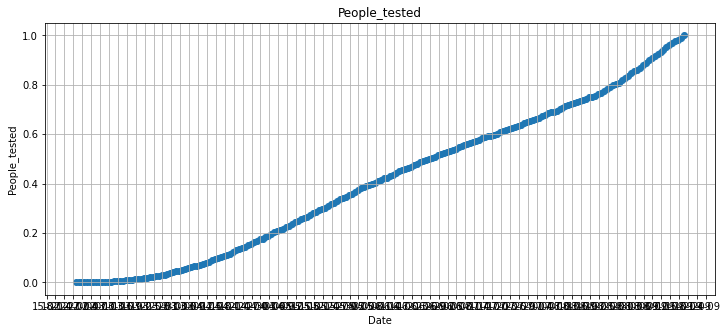

In [7]:
# Add code to plot the trend of the total number of people being tested as days progressed.
# X axis -> dates('Dates')
# Y axis -> number of people tested.('People_tested')

### Start of Code ###
variable = 'People_tested'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

### End of code ####

Graph 2: plot the total number of deaths for the entire period. Your X axis will be the dates ("Dates") and Y-axis will be the total number of death cases("Deaths") over the period of time.

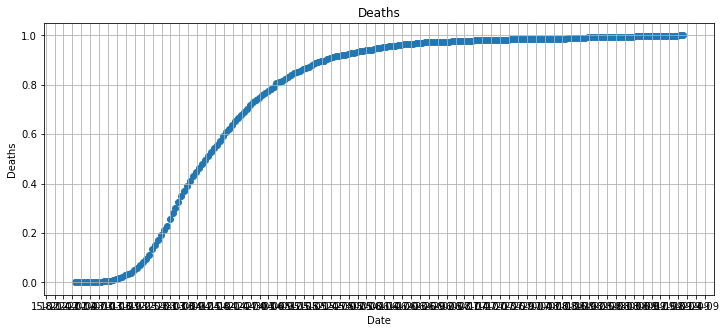

In [8]:
# Add code to plot the trend of total deaths as days progressed.
# X axis -> dates ('Dates')
# Y axis -> number of deaths ('Deaths')


### Start of Code ###
variable = 'Deaths'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()

### End of code ####

Graph 3: plot the total number of infected cases for the entire period. Your X axis will be the dates ("Dates") and Y-axis will be the total number of infected cases ('New_positive_cases') over the period of time.

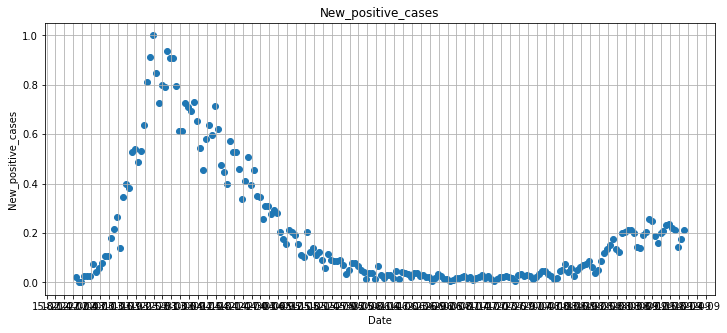

In [9]:
### Start of Code ###

variable = 'New_positive_cases'
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(date_format,data[variable])
ax.set(xlabel="Date",ylabel=variable,title=variable)
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 3))
fig.savefig(variable + '.png')
plt.show()


### End of code ####

# Calculate the feature matrix

The following is a function that accepts a list of feature names (e.g. ['Total_Hospitalized', 'People_tested']) and an target feature e.g. ('Deaths') and returns two things:

1. A numpy matrix whose columns are the desired features plus a column with a constant value 1, which is also known as the 'intercept'.
2. A numpy array that contains the values of the target output.


In [10]:
def get_numpy_data(data_frame, features, output):
    # Steps
    # select the columns of data_Frame given by the features list into the variable features_sframe which will include the constant
    # Convert the features_frame into a numpy matrix
    # assign the column of data_frame associated with the output to the array output_array
    # convert the array into a numpy array by first converting it to a list
    # return feature_matrix,output_array
    
    data_frame['constant'] = 1 # here we are adding a constant column 
    # add the column 'constant' to the front of the features list.
    features = ['constant'] + features 
        
    #select the columns of data_Frame given by the features list into the variable features_sframe which will include the constant)
    features_frame = data_frame[features]
    
    # Convert the features_frame into a numpy matrix
    feature_matrix = features_frame.to_numpy()
    #print ("feature_matrix:", feature_matrix)
    
    #assign the column of data_frame associated with the output to the array output_array
    output_array = data_frame[output]
    
    # convert the array into a numpy array by first converting it to a list
    output_array = output_array.to_numpy()
    
    return(feature_matrix, output_array)    

For dates, we need to convert them into a sequence of numbers. We now add a new column to our dataframe corresponding to the number of days since the start of the dataset.

In [11]:
X = date_format
day_numbers = []
for i in range(1, len(X) + 1):
    day_numbers.append([i])
    
data['Days'] = pd.DataFrame(day_numbers,columns = ['Days'])
data["Days"] = data["Days"].astype(int)

Test the above function for a particular input and output feature.

In [12]:
(example_features, example_output) = get_numpy_data(data, ['Days'], 'New_positive_cases')
print (example_features[0,:]) 
print (example_output[0]) 

[1 1]
0.022071307300509338


# Predict the outputs with given regression weights

Suppose we had the weights $[1, 1]$ corresponding to the features $[1, 100]$, to compute the predicted output, we can simply take the dot product between them, so the output is $1*1 + 1*100 = 101$. Now, let's create the data with 

In [13]:
(test_features, output) = get_numpy_data(data, ['Days'], 'New_positive_cases')

**Task P2:** Complete the following function  'predict_output'. Copy the the outputs of the code to the solution file.

In [14]:
def predict_output(feature_matrix, weights):
    # Inputs:
    # feature_matrix: a numpy matrix containing the features as columns (including the intercept), 
    #                 and each row corresponds to a data point
    # weights: a numpy array for the corresponding regression weights (including the intercept)
    # Output:
    # a numpy array that contains the predicted outputs (according to the provided weights) 
    # for all the data points in the featuer_matrix
 
    # Start of code ####
    
    predictions = np.dot(feature_matrix,weights)
    
    ## end of code

    return(predictions)

# Compute the derivative

We will now compute the derivative of the regression cost function: 
$$L_D(w) = \frac{1}{n}\sum_{i=1}^n (y_i-w\cdot x_i)^2,$$
where $x_i\in \mathrm{R}^d$ is the input feature of dimension $d$, $y_i\in\mathrm{R}$ is the output response, and $w\in\mathrm{R}^d$ is the regression weights.

**Task P3:** Complete the function 'weight_derivative' to calculate the derivative of the cost function with respect to regression weights $w$, i.e., $\frac{\partial}{\partial w}L_D(w)$. Note that this should be a $d$ dimensional vector. Also copy the output of the code for the test example to the solution file.

In [15]:
def weight_derivative(weights, feature_matrix, labels):
    # Input:
    # weights: weight vector w, a numpy vector of dimension d
    # feature_matrix: numpy array of size n by d, where n is the number of data points, and d is the feature dimension
    # labels: true labels y, a numpy vector of dimension d
    # Output:
    # Derivative of the regression cost function with respect to the weight w, a numpy array of dimension d
        
    ## Start of code ###
    test_predictions = predict_output(feature_matrix, weights) 
    errors = test_predictions - labels
    
    derivative = 2/len(labels)*np.dot(np.transpose(feature_matrix),errors)
    return(derivative)
    
    # End of code ###

In [16]:
# NOTE: copy the output to the solution file.

(example_features, example_output) = get_numpy_data(data, ['Days'], 'New_positive_cases') 
my_weights = np.array([0., 0.]) # this makes all the predictions 0
derivative = weight_derivative(my_weights, example_features,example_output)

print (derivative)

[ -0.4127345  -27.75735948]


# Gradient descent algorithm

Here, we will write a function to perform gradient descent algorithm on the lineare regression cost. Given an initial point, we will update the current weights by moving in the negative gradient direction to minimize the cost function. Thus, in each iteration we obtain the updated weight $w_{t+1}$ from the current iterate $w_t$ as follows:
$$w_{t+1} = w_t - h\frac{\partial}{\partial w}L_D(w_t),$$
where $h$ is the 'step_size' that is the amount by which we move in the negative gradient direction. 

We stop when we are sufficiently close to the optimum (where gradient is the zero vector) by checking the condition with respect to the magnitude (length) of the gradient vector:
$$\|\frac{\partial}{\partial w}L_D(w_t)\|_2\leq \epsilon,$$
where $\epsilon$ is the 'tolerance' parameter.

In [17]:
def regression_gradient_descent(feature_matrix, labels, initial_weights, step_size, tolerance):
    # Gradient descent algorithm for linear regression problem    
    
    # Input:
    # feature_matrix: numpy array of size n by d, where n is the number of data points, and d is the feature dimension
    # labels: true labels y, a numpy vector of dimension d
    # initial_weights: initial weight vector to start with, a numpy vector of dimension d
    # step_size: step size of update
    # tolerance: tolerace epsilon for stopping condition
    # Output:
    # Weights obtained after convergence

    converged = False 
    weights = np.array(initial_weights) # current iterate
    i = 0
    while not converged:
        # Start of code: your impelementation of what the gradient descent algorithm does in every iteration
        # Refer back to the update rule listed above: update the weight
        i += 1
        derivative = weight_derivative(weights, feature_matrix, labels)
        
        weights -= (step_size * derivative)
        
        # Compute the gradient magnitude:
        
        gradient_magnitude = sqrt(np.sum(derivative**2))
        
        # Check the stopping condition to decide whether you want to stop the iterations
        print ("grad mag :", gradient_magnitude)
        print ("tolerance:", tolerance)
        if gradient_magnitude < tolerance:
            converged = True
        
        # End of code
        
        print ("Iteration: ",i,"gradient_magnitude: ", gradient_magnitude) # for us to check about convergence
        
    return(weights)

# Use gradient descent for linear regression

Let's test the gradient descent algorithm for linear regression with a single feature ('Day'). Here we are using first 180 days' data as our training data.

In [18]:
#train_data
train_data = data[:180]

**Task P4:** Specify the initial_weights, step_size, and tolerance for the function `regression_gradient_descent`. Copy the outputs of the code to the solution file.


In [19]:
simple_features = ['Days']
my_output = 'New_positive_cases'

# Use get_numpy_data method to calculate the feature matrix and output. 
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)

#Initialize the weights, step size and tolerance
# Start of code
#STUDENT: Specify the initial_weights, step_size, and tolerance
initial_weights = np.array([1., 1.]) 
step_size = 7e-8
tolerance = 1.2e4
# end of code

# Use the regression_gradient_descent function to calculate the gradient decent and store it in the variable 'final_weights'
final_weights = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)

# end of code
print ("Here are the final weights after convergence:")
print (final_weights)

grad mag : 21941.082005254953
tolerance: 12000.0
Iteration:  1 gradient_magnitude:  21941.082005254953
grad mag : 21907.62780942753
tolerance: 12000.0
Iteration:  2 gradient_magnitude:  21907.62780942753
grad mag : 21874.22462217017
tolerance: 12000.0
Iteration:  3 gradient_magnitude:  21874.22462217017
grad mag : 21840.87236570865
tolerance: 12000.0
Iteration:  4 gradient_magnitude:  21840.87236570865
grad mag : 21807.570962387323
tolerance: 12000.0
Iteration:  5 gradient_magnitude:  21807.570962387323
grad mag : 21774.32033466895
tolerance: 12000.0
Iteration:  6 gradient_magnitude:  21774.32033466895
grad mag : 21741.12040513452
tolerance: 12000.0
Iteration:  7 gradient_magnitude:  21741.12040513452
grad mag : 21707.97109648306
tolerance: 12000.0
Iteration:  8 gradient_magnitude:  21707.97109648306
grad mag : 21674.87233153145
tolerance: 12000.0
Iteration:  9 gradient_magnitude:  21674.87233153145
grad mag : 21641.824033214285
tolerance: 12000.0
Iteration:  10 gradient_magnitude:  21

C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


**Task P6:** Use the learned weights to predict 'People_tested' in the last three weeks in the dataset. Copy the predictions to the solution file, and calculate the test error
$$\frac{1}{n_{\mathrm{tst}}}\sum_{i=1}^{n_{\mathrm{tst}}} (y_i^{\mathrm{tst}}-\hat{y}_i^{\mathrm{tst}})^2,$$
where $n_{\mathrm{tst}}$ is the number of test data, $y_i^{\mathrm{tst}}$ is the true label, $\hat{y}_i^{\mathrm{tst}}$ is the predicted label.

In [20]:
# Create the test data
test_data = data.iloc[-21:]
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)
test_predictions = predict_output(test_simple_feature_matrix, final_weights)
print (test_predictions)

[101.87203272 102.41437597 102.95671921 103.49906245 104.04140569
 104.58374893 105.12609218 105.66843542 106.21077866 106.7531219
 107.29546514 107.83780838 108.38015163 108.92249487 109.46483811
 110.00718135 110.54952459 111.09186784 111.63421108 112.17655432
 112.71889756]


C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# Linear regression using multiple features

Here, we will be considering multiple input features (`Intensive_care`,`New_positive_cases`,`Days`) to predict the `New_positive_cases` in the future.

**Task P7:** Specify the step size and tolerance for the function `regression_gradient_descent`. Print the outputs of the code.


In [21]:
model_features = ['Intensive_care','New_positive_cases','Days'] 
my_output = 'New_positive_cases'

#call the get_nupy_data method to calculate the feature matrix and output. Store them in the variables "multi_feature_matrix" & "output"

#start of code
(multi_feature_matrix, output) = get_numpy_data(data, model_features, my_output)

# end of code

# Initialize the weights, step size and tolerance
# Start of code
# STUDENT: Specify the initial_weights, step_size, and tolerance
initial_weights = np.array([0.2, 0.2,0.2,0.2])
step_size = 7e-9
tolerance = 1.2e2
# end of code
weight_2 = regression_gradient_descent(multi_feature_matrix, output, initial_weights, step_size, tolerance)
print ("Here are the final weights after convergence:")
print (weight_2)

grad mag : 5723.350748613349
tolerance: 120.0
Iteration:  1 gradient_magnitude:  5723.350748613349
grad mag : 5722.208998260265
tolerance: 120.0
Iteration:  2 gradient_magnitude:  5722.208998260265
grad mag : 5721.067475674781
tolerance: 120.0
Iteration:  3 gradient_magnitude:  5721.067475674781
grad mag : 5719.926180811461
tolerance: 120.0
Iteration:  4 gradient_magnitude:  5719.926180811461
grad mag : 5718.7851136248755
tolerance: 120.0
Iteration:  5 gradient_magnitude:  5718.7851136248755
grad mag : 5717.644274069607
tolerance: 120.0
Iteration:  6 gradient_magnitude:  5717.644274069607
grad mag : 5716.503662100243
tolerance: 120.0
Iteration:  7 gradient_magnitude:  5716.503662100243
grad mag : 5715.363277671387
tolerance: 120.0
Iteration:  8 gradient_magnitude:  5715.363277671387
grad mag : 5714.223120737641
tolerance: 120.0
Iteration:  9 gradient_magnitude:  5714.223120737641
grad mag : 5713.083191253625
tolerance: 120.0
Iteration:  10 gradient_magnitude:  5713.083191253625
grad ma

Iteration:  460 gradient_magnitude:  5222.516928237501
grad mag : 5221.475089145601
tolerance: 120.0
Iteration:  461 gradient_magnitude:  5221.475089145601
grad mag : 5220.433457890018
tolerance: 120.0
Iteration:  462 gradient_magnitude:  5220.433457890018
grad mag : 5219.392034429294
tolerance: 120.0
Iteration:  463 gradient_magnitude:  5219.392034429294
grad mag : 5218.350818721973
tolerance: 120.0
Iteration:  464 gradient_magnitude:  5218.350818721973
grad mag : 5217.309810726615
tolerance: 120.0
Iteration:  465 gradient_magnitude:  5217.309810726615
grad mag : 5216.269010401777
tolerance: 120.0
Iteration:  466 gradient_magnitude:  5216.269010401777
grad mag : 5215.228417706039
tolerance: 120.0
Iteration:  467 gradient_magnitude:  5215.228417706039
grad mag : 5214.188032597973
tolerance: 120.0
Iteration:  468 gradient_magnitude:  5214.188032597973
grad mag : 5213.147855036173
tolerance: 120.0
Iteration:  469 gradient_magnitude:  5213.147855036173
grad mag : 5212.107884979232
toleran

tolerance: 120.0
Iteration:  930 gradient_magnitude:  4755.062668501637
grad mag : 4754.114081787546
tolerance: 120.0
Iteration:  931 gradient_magnitude:  4754.114081787546
grad mag : 4753.165684306872
tolerance: 120.0
Iteration:  932 gradient_magnitude:  4753.165684306872
grad mag : 4752.217476021865
tolerance: 120.0
Iteration:  933 gradient_magnitude:  4752.217476021865
grad mag : 4751.269456894783
tolerance: 120.0
Iteration:  934 gradient_magnitude:  4751.269456894783
grad mag : 4750.321626887887
tolerance: 120.0
Iteration:  935 gradient_magnitude:  4750.321626887887
grad mag : 4749.373985963453
tolerance: 120.0
Iteration:  936 gradient_magnitude:  4749.373985963453
grad mag : 4748.426534083762
tolerance: 120.0
Iteration:  937 gradient_magnitude:  4748.426534083762
grad mag : 4747.479271211098
tolerance: 120.0
Iteration:  938 gradient_magnitude:  4747.479271211098
grad mag : 4746.532197307759
tolerance: 120.0
Iteration:  939 gradient_magnitude:  4746.532197307759
grad mag : 4745.585

Iteration:  1460 gradient_magnitude:  4277.93197851257
grad mag : 4277.078574525867
tolerance: 120.0
Iteration:  1461 gradient_magnitude:  4277.078574525867
grad mag : 4276.225340784595
tolerance: 120.0
Iteration:  1462 gradient_magnitude:  4276.225340784595
grad mag : 4275.372277254788
tolerance: 120.0
Iteration:  1463 gradient_magnitude:  4275.372277254788
grad mag : 4274.519383902492
tolerance: 120.0
Iteration:  1464 gradient_magnitude:  4274.519383902492
grad mag : 4273.666660693761
tolerance: 120.0
Iteration:  1465 gradient_magnitude:  4273.666660693761
grad mag : 4272.814107594649
tolerance: 120.0
Iteration:  1466 gradient_magnitude:  4272.814107594649
grad mag : 4271.9617245712225
tolerance: 120.0
Iteration:  1467 gradient_magnitude:  4271.9617245712225
grad mag : 4271.109511589554
tolerance: 120.0
Iteration:  1468 gradient_magnitude:  4271.109511589554
grad mag : 4270.25746861572
tolerance: 120.0
Iteration:  1469 gradient_magnitude:  4270.25746861572
grad mag : 4269.40559561580

tolerance: 120.0
Iteration:  1960 gradient_magnitude:  3871.7818887205735
grad mag : 3871.009507552335
tolerance: 120.0
Iteration:  1961 gradient_magnitude:  3871.009507552335
grad mag : 3870.2372804662946
tolerance: 120.0
Iteration:  1962 gradient_magnitude:  3870.2372804662946
grad mag : 3869.4652074317164
tolerance: 120.0
Iteration:  1963 gradient_magnitude:  3869.4652074317164
grad mag : 3868.6932884178686
tolerance: 120.0
Iteration:  1964 gradient_magnitude:  3868.6932884178686
grad mag : 3867.9215233940254
tolerance: 120.0
Iteration:  1965 gradient_magnitude:  3867.9215233940254
grad mag : 3867.149912329466
tolerance: 120.0
Iteration:  1966 gradient_magnitude:  3867.149912329466
grad mag : 3866.37845519348
tolerance: 120.0
Iteration:  1967 gradient_magnitude:  3866.37845519348
grad mag : 3865.607151955356
tolerance: 120.0
Iteration:  1968 gradient_magnitude:  3865.607151955356
grad mag : 3864.8360025843967
tolerance: 120.0
Iteration:  1969 gradient_magnitude:  3864.8360025843967


grad mag : 3506.989592890451
tolerance: 120.0
Iteration:  2456 gradient_magnitude:  3506.989592890451
grad mag : 3506.2899840807736
tolerance: 120.0
Iteration:  2457 gradient_magnitude:  3506.2899840807736
grad mag : 3505.590514835949
tolerance: 120.0
Iteration:  2458 gradient_magnitude:  3505.590514835949
grad mag : 3504.891185128136
tolerance: 120.0
Iteration:  2459 gradient_magnitude:  3504.891185128136
grad mag : 3504.191994929497
tolerance: 120.0
Iteration:  2460 gradient_magnitude:  3504.191994929497
grad mag : 3503.492944212204
tolerance: 120.0
Iteration:  2461 gradient_magnitude:  3503.492944212204
grad mag : 3502.794032948429
tolerance: 120.0
Iteration:  2462 gradient_magnitude:  3502.794032948429
grad mag : 3502.0952611103535
tolerance: 120.0
Iteration:  2463 gradient_magnitude:  3502.0952611103535
grad mag : 3501.396628670165
tolerance: 120.0
Iteration:  2464 gradient_magnitude:  3501.396628670165
grad mag : 3500.6981356000533
tolerance: 120.0
Iteration:  2465 gradient_magni

Iteration:  2897 gradient_magnitude:  3211.615899095692
grad mag : 3210.9752143384208
tolerance: 120.0
Iteration:  2898 gradient_magnitude:  3210.9752143384208
grad mag : 3210.3346573912518
tolerance: 120.0
Iteration:  2899 gradient_magnitude:  3210.3346573912518
grad mag : 3209.6942282286886
tolerance: 120.0
Iteration:  2900 gradient_magnitude:  3209.6942282286886
grad mag : 3209.05392682524
tolerance: 120.0
Iteration:  2901 gradient_magnitude:  3209.05392682524
grad mag : 3208.4137531554197
tolerance: 120.0
Iteration:  2902 gradient_magnitude:  3208.4137531554197
grad mag : 3207.7737071937463
tolerance: 120.0
Iteration:  2903 gradient_magnitude:  3207.7737071937463
grad mag : 3207.133788914741
tolerance: 120.0
Iteration:  2904 gradient_magnitude:  3207.133788914741
grad mag : 3206.4939982929354
tolerance: 120.0
Iteration:  2905 gradient_magnitude:  3206.4939982929354
grad mag : 3205.8543353028613
tolerance: 120.0
Iteration:  2906 gradient_magnitude:  3205.8543353028613
grad mag : 320

tolerance: 120.0
Iteration:  3335 gradient_magnitude:  2942.8807168654866
grad mag : 2942.2936420480823
tolerance: 120.0
Iteration:  3336 gradient_magnitude:  2942.2936420480823
grad mag : 2941.7066843461425
tolerance: 120.0
Iteration:  3337 gradient_magnitude:  2941.7066843461425
grad mag : 2941.119843736304
tolerance: 120.0
Iteration:  3338 gradient_magnitude:  2941.119843736304
grad mag : 2940.533120195207
tolerance: 120.0
Iteration:  3339 gradient_magnitude:  2940.533120195207
grad mag : 2939.9465136995
tolerance: 120.0
Iteration:  3340 gradient_magnitude:  2939.9465136995
grad mag : 2939.3600242258303
tolerance: 120.0
Iteration:  3341 gradient_magnitude:  2939.3600242258303
grad mag : 2938.773651750856
tolerance: 120.0
Iteration:  3342 gradient_magnitude:  2938.773651750856
grad mag : 2938.187396251235
tolerance: 120.0
Iteration:  3343 gradient_magnitude:  2938.187396251235
grad mag : 2937.601257703633
tolerance: 120.0
Iteration:  3344 gradient_magnitude:  2937.601257703633
grad m

Iteration:  3786 gradient_magnitude:  2689.647225479588
grad mag : 2689.1106681721535
tolerance: 120.0
Iteration:  3787 gradient_magnitude:  2689.1106681721535
grad mag : 2688.5742179024533
tolerance: 120.0
Iteration:  3788 gradient_magnitude:  2688.5742179024533
grad mag : 2688.037874649134
tolerance: 120.0
Iteration:  3789 gradient_magnitude:  2688.037874649134
grad mag : 2687.5016383908473
tolerance: 120.0
Iteration:  3790 gradient_magnitude:  2687.5016383908473
grad mag : 2686.9655091062486
tolerance: 120.0
Iteration:  3791 gradient_magnitude:  2686.9655091062486
grad mag : 2686.4294867739986
tolerance: 120.0
Iteration:  3792 gradient_magnitude:  2686.4294867739986
grad mag : 2685.8935713727597
tolerance: 120.0
Iteration:  3793 gradient_magnitude:  2685.8935713727597
grad mag : 2685.3577628812022
tolerance: 120.0
Iteration:  3794 gradient_magnitude:  2685.3577628812022
grad mag : 2684.8220612779965
tolerance: 120.0
Iteration:  3795 gradient_magnitude:  2684.8220612779965
grad mag :

Iteration:  4272 gradient_magnitude:  2441.0988975520386
grad mag : 2440.6119231120506
tolerance: 120.0
Iteration:  4273 gradient_magnitude:  2440.6119231120506
grad mag : 2440.125045818517
tolerance: 120.0
Iteration:  4274 gradient_magnitude:  2440.125045818517
grad mag : 2439.6382656520595
tolerance: 120.0
Iteration:  4275 gradient_magnitude:  2439.6382656520595
grad mag : 2439.151582593302
tolerance: 120.0
Iteration:  4276 gradient_magnitude:  2439.151582593302
grad mag : 2438.664996622873
tolerance: 120.0
Iteration:  4277 gradient_magnitude:  2438.664996622873
grad mag : 2438.1785077214035
tolerance: 120.0
Iteration:  4278 gradient_magnitude:  2438.1785077214035
grad mag : 2437.6921158695295
tolerance: 120.0
Iteration:  4279 gradient_magnitude:  2437.6921158695295
grad mag : 2437.205821047891
tolerance: 120.0
Iteration:  4280 gradient_magnitude:  2437.205821047891
grad mag : 2436.7196232371307
tolerance: 120.0
Iteration:  4281 gradient_magnitude:  2436.7196232371307
grad mag : 2436

grad mag : 2236.8374985039677
tolerance: 120.0
Iteration:  4710 gradient_magnitude:  2236.8374985039677
grad mag : 2236.3912721388488
tolerance: 120.0
Iteration:  4711 gradient_magnitude:  2236.3912721388488
grad mag : 2235.945134791359
tolerance: 120.0
Iteration:  4712 gradient_magnitude:  2235.945134791359
grad mag : 2235.499086443739
tolerance: 120.0
Iteration:  4713 gradient_magnitude:  2235.499086443739
grad mag : 2235.0531270782353
tolerance: 120.0
Iteration:  4714 gradient_magnitude:  2235.0531270782353
grad mag : 2234.6072566770963
tolerance: 120.0
Iteration:  4715 gradient_magnitude:  2234.6072566770963
grad mag : 2234.161475222575
tolerance: 120.0
Iteration:  4716 gradient_magnitude:  2234.161475222575
grad mag : 2233.715782696927
tolerance: 120.0
Iteration:  4717 gradient_magnitude:  2233.715782696927
grad mag : 2233.2701790824103
tolerance: 120.0
Iteration:  4718 gradient_magnitude:  2233.2701790824103
grad mag : 2232.8246643612915
tolerance: 120.0
Iteration:  4719 gradient

grad mag : 2024.470458889268
tolerance: 120.0
Iteration:  5210 gradient_magnitude:  2024.470458889268
grad mag : 2024.0665975920122
tolerance: 120.0
Iteration:  5211 gradient_magnitude:  2024.0665975920122
grad mag : 2023.6628168609843
tolerance: 120.0
Iteration:  5212 gradient_magnitude:  2023.6628168609843
grad mag : 2023.2591166801114
tolerance: 120.0
Iteration:  5213 gradient_magnitude:  2023.2591166801114
grad mag : 2022.8554970333253
tolerance: 120.0
Iteration:  5214 gradient_magnitude:  2022.8554970333253
grad mag : 2022.4519579045602
tolerance: 120.0
Iteration:  5215 gradient_magnitude:  2022.4519579045602
grad mag : 2022.0484992777529
tolerance: 120.0
Iteration:  5216 gradient_magnitude:  2022.0484992777529
grad mag : 2021.6451211368455
tolerance: 120.0
Iteration:  5217 gradient_magnitude:  2021.6451211368455
grad mag : 2021.2418234657807
tolerance: 120.0
Iteration:  5218 gradient_magnitude:  2021.2418234657807
grad mag : 2020.8386062485054
tolerance: 120.0
Iteration:  5219 gr

tolerance: 120.0
Iteration:  5772 gradient_magnitude:  1809.7409033510019
grad mag : 1809.3798784195587
tolerance: 120.0
Iteration:  5773 gradient_magnitude:  1809.3798784195587
grad mag : 1809.0189255089244
tolerance: 120.0
Iteration:  5774 gradient_magnitude:  1809.0189255089244
grad mag : 1808.6580446047296
tolerance: 120.0
Iteration:  5775 gradient_magnitude:  1808.6580446047296
grad mag : 1808.297235692611
tolerance: 120.0
Iteration:  5776 gradient_magnitude:  1808.297235692611
grad mag : 1807.936498758206
tolerance: 120.0
Iteration:  5777 gradient_magnitude:  1807.936498758206
grad mag : 1807.5758337871573
tolerance: 120.0
Iteration:  5778 gradient_magnitude:  1807.5758337871573
grad mag : 1807.2152407651063
tolerance: 120.0
Iteration:  5779 gradient_magnitude:  1807.2152407651063
grad mag : 1806.8547196777026
tolerance: 120.0
Iteration:  5780 gradient_magnitude:  1806.8547196777026
grad mag : 1806.4942705105946
tolerance: 120.0
Iteration:  5781 gradient_magnitude:  1806.49427051

Iteration:  6334 gradient_magnitude:  1617.7870726874007
grad mag : 1617.464340595957
tolerance: 120.0
Iteration:  6335 gradient_magnitude:  1617.464340595957
grad mag : 1617.1416728862887
tolerance: 120.0
Iteration:  6336 gradient_magnitude:  1617.1416728862887
grad mag : 1616.8190695455517
tolerance: 120.0
Iteration:  6337 gradient_magnitude:  1616.8190695455517
grad mag : 1616.4965305609048
tolerance: 120.0
Iteration:  6338 gradient_magnitude:  1616.4965305609048
grad mag : 1616.1740559195111
tolerance: 120.0
Iteration:  6339 gradient_magnitude:  1616.1740559195111
grad mag : 1615.851645608533
tolerance: 120.0
Iteration:  6340 gradient_magnitude:  1615.851645608533
grad mag : 1615.5292996151384
tolerance: 120.0
Iteration:  6341 gradient_magnitude:  1615.5292996151384
grad mag : 1615.2070179264956
tolerance: 120.0
Iteration:  6342 gradient_magnitude:  1615.2070179264956
grad mag : 1614.8848005297777
tolerance: 120.0
Iteration:  6343 gradient_magnitude:  1614.8848005297777
grad mag : 

Iteration:  6834 gradient_magnitude:  1464.1931477161506
grad mag : 1463.9010560530674
tolerance: 120.0
Iteration:  6835 gradient_magnitude:  1463.9010560530674
grad mag : 1463.6090226593042
tolerance: 120.0
Iteration:  6836 gradient_magnitude:  1463.6090226593042
grad mag : 1463.3170475232382
tolerance: 120.0
Iteration:  6837 gradient_magnitude:  1463.3170475232382
grad mag : 1463.025130633247
tolerance: 120.0
Iteration:  6838 gradient_magnitude:  1463.025130633247
grad mag : 1462.7332719777114
tolerance: 120.0
Iteration:  6839 gradient_magnitude:  1462.7332719777114
grad mag : 1462.4414715450134
tolerance: 120.0
Iteration:  6840 gradient_magnitude:  1462.4414715450134
grad mag : 1462.1497293235384
tolerance: 120.0
Iteration:  6841 gradient_magnitude:  1462.1497293235384
grad mag : 1461.8580453016748
tolerance: 120.0
Iteration:  6842 gradient_magnitude:  1461.8580453016748
grad mag : 1461.566419467811
tolerance: 120.0
Iteration:  6843 gradient_magnitude:  1461.566419467811
grad mag : 

tolerance: 120.0
Iteration:  7397 gradient_magnitude:  1308.6294287255193
grad mag : 1308.368370444721
tolerance: 120.0
Iteration:  7398 gradient_magnitude:  1308.368370444721
grad mag : 1308.1073642423987
tolerance: 120.0
Iteration:  7399 gradient_magnitude:  1308.1073642423987
grad mag : 1307.8464101081636
tolerance: 120.0
Iteration:  7400 gradient_magnitude:  1307.8464101081636
grad mag : 1307.5855080316285
tolerance: 120.0
Iteration:  7401 gradient_magnitude:  1307.5855080316285
grad mag : 1307.3246580024077
tolerance: 120.0
Iteration:  7402 gradient_magnitude:  1307.3246580024077
grad mag : 1307.06386001012
tolerance: 120.0
Iteration:  7403 gradient_magnitude:  1307.06386001012
grad mag : 1306.803114044383
tolerance: 120.0
Iteration:  7404 gradient_magnitude:  1306.803114044383
grad mag : 1306.5424200948182
tolerance: 120.0
Iteration:  7405 gradient_magnitude:  1306.5424200948182
grad mag : 1306.2817781510496
tolerance: 120.0
Iteration:  7406 gradient_magnitude:  1306.281778151049

Iteration:  7959 gradient_magnitude:  1169.8270008156017
grad mag : 1169.5936322097423
tolerance: 120.0
Iteration:  7960 gradient_magnitude:  1169.5936322097423
grad mag : 1169.36031015855
tolerance: 120.0
Iteration:  7961 gradient_magnitude:  1169.36031015855
grad mag : 1169.127034652738
tolerance: 120.0
Iteration:  7962 gradient_magnitude:  1169.127034652738
grad mag : 1168.893805683021
tolerance: 120.0
Iteration:  7963 gradient_magnitude:  1168.893805683021
grad mag : 1168.6606232401145
tolerance: 120.0
Iteration:  7964 gradient_magnitude:  1168.6606232401145
grad mag : 1168.427487314738
tolerance: 120.0
Iteration:  7965 gradient_magnitude:  1168.427487314738
grad mag : 1168.1943978976115
tolerance: 120.0
Iteration:  7966 gradient_magnitude:  1168.1943978976115
grad mag : 1167.9613549794565
tolerance: 120.0
Iteration:  7967 gradient_magnitude:  1167.9613549794565
grad mag : 1167.7283585509974
tolerance: 120.0
Iteration:  7968 gradient_magnitude:  1167.7283585509974
grad mag : 1167.4

grad mag : 1045.5383174751282
tolerance: 120.0
Iteration:  8522 gradient_magnitude:  1045.5383174751282
grad mag : 1045.329743199569
tolerance: 120.0
Iteration:  8523 gradient_magnitude:  1045.329743199569
grad mag : 1045.12121053246
tolerance: 120.0
Iteration:  8524 gradient_magnitude:  1045.12121053246
grad mag : 1044.9127194655005
tolerance: 120.0
Iteration:  8525 gradient_magnitude:  1044.9127194655005
grad mag : 1044.7042699903918
tolerance: 120.0
Iteration:  8526 gradient_magnitude:  1044.7042699903918
grad mag : 1044.4958620988368
tolerance: 120.0
Iteration:  8527 gradient_magnitude:  1044.4958620988368
grad mag : 1044.28749578254
tolerance: 120.0
Iteration:  8528 gradient_magnitude:  1044.28749578254
grad mag : 1044.0791710332076
tolerance: 120.0
Iteration:  8529 gradient_magnitude:  1044.0791710332076
grad mag : 1043.8708878425473
tolerance: 120.0
Iteration:  8530 gradient_magnitude:  1043.8708878425473
grad mag : 1043.6626462022691
tolerance: 120.0
Iteration:  8531 gradient_m

Iteration:  9084 gradient_magnitude:  934.6411808093362
grad mag : 934.4547293865231
tolerance: 120.0
Iteration:  9085 gradient_magnitude:  934.4547293865231
grad mag : 934.2683151588755
tolerance: 120.0
Iteration:  9086 gradient_magnitude:  934.2683151588755
grad mag : 934.0819381189739
tolerance: 120.0
Iteration:  9087 gradient_magnitude:  934.0819381189739
grad mag : 933.8955982593992
tolerance: 120.0
Iteration:  9088 gradient_magnitude:  933.8955982593992
grad mag : 933.7092955727344
tolerance: 120.0
Iteration:  9089 gradient_magnitude:  933.7092955727344
grad mag : 933.5230300515641
tolerance: 120.0
Iteration:  9090 gradient_magnitude:  933.5230300515641
grad mag : 933.3368016884739
tolerance: 120.0
Iteration:  9091 gradient_magnitude:  933.3368016884739
grad mag : 933.1506104760512
tolerance: 120.0
Iteration:  9092 gradient_magnitude:  933.1506104760512
grad mag : 932.9644564068848
tolerance: 120.0
Iteration:  9093 gradient_magnitude:  932.9644564068848
grad mag : 932.77833947356

Iteration:  9584 gradient_magnitude:  845.9056425779263
grad mag : 845.7368929940228
tolerance: 120.0
Iteration:  9585 gradient_magnitude:  845.7368929940228
grad mag : 845.5681770739477
tolerance: 120.0
Iteration:  9586 gradient_magnitude:  845.5681770739477
grad mag : 845.3994948109855
tolerance: 120.0
Iteration:  9587 gradient_magnitude:  845.3994948109855
grad mag : 845.2308461984225
tolerance: 120.0
Iteration:  9588 gradient_magnitude:  845.2308461984225
grad mag : 845.062231229545
tolerance: 120.0
Iteration:  9589 gradient_magnitude:  845.062231229545
grad mag : 844.8936498976419
tolerance: 120.0
Iteration:  9590 gradient_magnitude:  844.8936498976419
grad mag : 844.7251021960029
tolerance: 120.0
Iteration:  9591 gradient_magnitude:  844.7251021960029
grad mag : 844.5565881179191
tolerance: 120.0
Iteration:  9592 gradient_magnitude:  844.5565881179191
grad mag : 844.3881076566829
tolerance: 120.0
Iteration:  9593 gradient_magnitude:  844.3881076566829
grad mag : 844.219660805588


Iteration:  10146 gradient_magnitude:  756.1829497159044
grad mag : 756.0320988982714
tolerance: 120.0
Iteration:  10147 gradient_magnitude:  756.0320988982714
grad mag : 755.8812781738449
tolerance: 120.0
Iteration:  10148 gradient_magnitude:  755.8812781738449
grad mag : 755.7304875366218
tolerance: 120.0
Iteration:  10149 gradient_magnitude:  755.7304875366218
grad mag : 755.5797269805998
tolerance: 120.0
Iteration:  10150 gradient_magnitude:  755.5797269805998
grad mag : 755.4289964997779
tolerance: 120.0
Iteration:  10151 gradient_magnitude:  755.4289964997779
grad mag : 755.2782960881566
tolerance: 120.0
Iteration:  10152 gradient_magnitude:  755.2782960881566
grad mag : 755.1276257397375
tolerance: 120.0
Iteration:  10153 gradient_magnitude:  755.1276257397375
grad mag : 754.9769854485232
tolerance: 120.0
Iteration:  10154 gradient_magnitude:  754.9769854485232
grad mag : 754.8263752085178
tolerance: 120.0
Iteration:  10155 gradient_magnitude:  754.8263752085178
grad mag : 754.6

tolerance: 120.0
Iteration:  10709 gradient_magnitude:  675.8420254175155
grad mag : 675.7072017986195
tolerance: 120.0
Iteration:  10710 gradient_magnitude:  675.7072017986195
grad mag : 675.5724050756667
tolerance: 120.0
Iteration:  10711 gradient_magnitude:  675.5724050756667
grad mag : 675.4376352432915
tolerance: 120.0
Iteration:  10712 gradient_magnitude:  675.4376352432915
grad mag : 675.3028922961297
tolerance: 120.0
Iteration:  10713 gradient_magnitude:  675.3028922961297
grad mag : 675.168176228818
tolerance: 120.0
Iteration:  10714 gradient_magnitude:  675.168176228818
grad mag : 675.0334870359941
tolerance: 120.0
Iteration:  10715 gradient_magnitude:  675.0334870359941
grad mag : 674.8988247122965
tolerance: 120.0
Iteration:  10716 gradient_magnitude:  674.8988247122965
grad mag : 674.7641892523656
tolerance: 120.0
Iteration:  10717 gradient_magnitude:  674.7641892523656
grad mag : 674.6295806508421
tolerance: 120.0
Iteration:  10718 gradient_magnitude:  674.6295806508421
g

Iteration:  11271 gradient_magnitude:  604.1574744682622
grad mag : 604.0369511895501
tolerance: 120.0
Iteration:  11272 gradient_magnitude:  604.0369511895501
grad mag : 603.9164519540088
tolerance: 120.0
Iteration:  11273 gradient_magnitude:  603.9164519540088
grad mag : 603.7959767568417
tolerance: 120.0
Iteration:  11274 gradient_magnitude:  603.7959767568417
grad mag : 603.6755255932536
tolerance: 120.0
Iteration:  11275 gradient_magnitude:  603.6755255932536
grad mag : 603.5550984584497
tolerance: 120.0
Iteration:  11276 gradient_magnitude:  603.5550984584497
grad mag : 603.4346953476368
tolerance: 120.0
Iteration:  11277 gradient_magnitude:  603.4346953476368
grad mag : 603.3143162560223
tolerance: 120.0
Iteration:  11278 gradient_magnitude:  603.3143162560223
grad mag : 603.1939611788143
tolerance: 120.0
Iteration:  11279 gradient_magnitude:  603.1939611788143
grad mag : 603.0736301112228
tolerance: 120.0
Iteration:  11280 gradient_magnitude:  603.0736301112228
grad mag : 602.9

tolerance: 120.0
Iteration:  11834 gradient_magnitude:  539.9685508723877
grad mag : 539.8608326323495
tolerance: 120.0
Iteration:  11835 gradient_magnitude:  539.8608326323495
grad mag : 539.7531358810068
tolerance: 120.0
Iteration:  11836 gradient_magnitude:  539.7531358810068
grad mag : 539.6454606140726
tolerance: 120.0
Iteration:  11837 gradient_magnitude:  539.6454606140726
grad mag : 539.5378068272616
tolerance: 120.0
Iteration:  11838 gradient_magnitude:  539.5378068272616
grad mag : 539.4301745162882
tolerance: 120.0
Iteration:  11839 gradient_magnitude:  539.4301745162882
grad mag : 539.3225636768682
tolerance: 120.0
Iteration:  11840 gradient_magnitude:  539.3225636768682
grad mag : 539.2149743047183
tolerance: 120.0
Iteration:  11841 gradient_magnitude:  539.2149743047183
grad mag : 539.1074063955562
tolerance: 120.0
Iteration:  11842 gradient_magnitude:  539.1074063955562
grad mag : 538.9998599451
tolerance: 120.0
Iteration:  11843 gradient_magnitude:  538.9998599451
grad 

grad mag : 483.85270960161125
tolerance: 120.0
Iteration:  12384 gradient_magnitude:  483.85270960161125
grad mag : 483.75618590232943
tolerance: 120.0
Iteration:  12385 gradient_magnitude:  483.75618590232943
grad mag : 483.65968145854595
tolerance: 120.0
Iteration:  12386 gradient_magnitude:  483.65968145854595
grad mag : 483.56319626641954
tolerance: 120.0
Iteration:  12387 gradient_magnitude:  483.56319626641954
grad mag : 483.46673032210975
tolerance: 120.0
Iteration:  12388 gradient_magnitude:  483.46673032210975
grad mag : 483.3702836217767
tolerance: 120.0
Iteration:  12389 gradient_magnitude:  483.3702836217767
grad mag : 483.27385616158153
tolerance: 120.0
Iteration:  12390 gradient_magnitude:  483.27385616158153
grad mag : 483.1774479376859
tolerance: 120.0
Iteration:  12391 gradient_magnitude:  483.1774479376859
grad mag : 483.0810589462526
tolerance: 120.0
Iteration:  12392 gradient_magnitude:  483.0810589462526
grad mag : 482.98468918344463
tolerance: 120.0
Iteration:  12

grad mag : 432.70451746463857
tolerance: 120.0
Iteration:  12944 gradient_magnitude:  432.70451746463857
grad mag : 432.61819731059666
tolerance: 120.0
Iteration:  12945 gradient_magnitude:  432.61819731059666
grad mag : 432.5318943765495
tolerance: 120.0
Iteration:  12946 gradient_magnitude:  432.5318943765495
grad mag : 432.44560865906186
tolerance: 120.0
Iteration:  12947 gradient_magnitude:  432.44560865906186
grad mag : 432.35934015469917
tolerance: 120.0
Iteration:  12948 gradient_magnitude:  432.35934015469917
grad mag : 432.2730888600278
tolerance: 120.0
Iteration:  12949 gradient_magnitude:  432.2730888600278
grad mag : 432.1868547716143
tolerance: 120.0
Iteration:  12950 gradient_magnitude:  432.1868547716143
grad mag : 432.10063788602645
tolerance: 120.0
Iteration:  12951 gradient_magnitude:  432.10063788602645
grad mag : 432.0144381998323
tolerance: 120.0
Iteration:  12952 gradient_magnitude:  432.0144381998323
grad mag : 431.92825570960076
tolerance: 120.0
Iteration:  1295

grad mag : 387.9681547134535
tolerance: 120.0
Iteration:  13491 gradient_magnitude:  387.9681547134535
grad mag : 387.8907590098309
tolerance: 120.0
Iteration:  13492 gradient_magnitude:  387.8907590098309
grad mag : 387.8133787458658
tolerance: 120.0
Iteration:  13493 gradient_magnitude:  387.8133787458658
grad mag : 387.73601391847836
tolerance: 120.0
Iteration:  13494 gradient_magnitude:  387.73601391847836
grad mag : 387.65866452458897
tolerance: 120.0
Iteration:  13495 gradient_magnitude:  387.65866452458897
grad mag : 387.5813305611188
tolerance: 120.0
Iteration:  13496 gradient_magnitude:  387.5813305611188
grad mag : 387.5040120249897
tolerance: 120.0
Iteration:  13497 gradient_magnitude:  387.5040120249897
grad mag : 387.4267089131241
tolerance: 120.0
Iteration:  13498 gradient_magnitude:  387.4267089131241
grad mag : 387.3494212224451
tolerance: 120.0
Iteration:  13499 gradient_magnitude:  387.3494212224451
grad mag : 387.272148949876
tolerance: 120.0
Iteration:  13500 gradie

grad mag : 344.67915108108934
tolerance: 120.0
Iteration:  14084 gradient_magnitude:  344.67915108108934
grad mag : 344.61039109451525
tolerance: 120.0
Iteration:  14085 gradient_magnitude:  344.61039109451525
grad mag : 344.54164482486095
tolerance: 120.0
Iteration:  14086 gradient_magnitude:  344.54164482486095
grad mag : 344.4729122693901
tolerance: 120.0
Iteration:  14087 gradient_magnitude:  344.4729122693901
grad mag : 344.40419342536694
tolerance: 120.0
Iteration:  14088 gradient_magnitude:  344.40419342536694
grad mag : 344.33548829005593
tolerance: 120.0
Iteration:  14089 gradient_magnitude:  344.33548829005593
grad mag : 344.26679686072265
tolerance: 120.0
Iteration:  14090 gradient_magnitude:  344.26679686072265
grad mag : 344.1981191346327
tolerance: 120.0
Iteration:  14091 gradient_magnitude:  344.1981191346327
grad mag : 344.1294551090524
tolerance: 120.0
Iteration:  14092 gradient_magnitude:  344.1294551090524
grad mag : 344.0608047812486
tolerance: 120.0
Iteration:  140

Iteration:  14637 gradient_magnitude:  308.67381515474943
grad mag : 308.61223786750213
tolerance: 120.0
Iteration:  14638 gradient_magnitude:  308.61223786750213
grad mag : 308.55067286429914
tolerance: 120.0
Iteration:  14639 gradient_magnitude:  308.55067286429914
grad mag : 308.48912014269
tolerance: 120.0
Iteration:  14640 gradient_magnitude:  308.48912014269
grad mag : 308.4275797002245
tolerance: 120.0
Iteration:  14641 gradient_magnitude:  308.4275797002245
grad mag : 308.3660515344533
tolerance: 120.0
Iteration:  14642 gradient_magnitude:  308.3660515344533
grad mag : 308.30453564292714
tolerance: 120.0
Iteration:  14643 gradient_magnitude:  308.30453564292714
grad mag : 308.24303202319743
tolerance: 120.0
Iteration:  14644 gradient_magnitude:  308.24303202319743
grad mag : 308.1815406728162
tolerance: 120.0
Iteration:  14645 gradient_magnitude:  308.1815406728162
grad mag : 308.1200615893358
tolerance: 120.0
Iteration:  14646 gradient_magnitude:  308.1200615893358
grad mag : 

grad mag : 275.6035935988241
tolerance: 120.0
Iteration:  15205 gradient_magnitude:  275.6035935988241
grad mag : 275.54861348545927
tolerance: 120.0
Iteration:  15206 gradient_magnitude:  275.54861348545927
grad mag : 275.49364434006975
tolerance: 120.0
Iteration:  15207 gradient_magnitude:  275.49364434006975
grad mag : 275.4386861604674
tolerance: 120.0
Iteration:  15208 gradient_magnitude:  275.4386861604674
grad mag : 275.38373894446477
tolerance: 120.0
Iteration:  15209 gradient_magnitude:  275.38373894446477
grad mag : 275.3288026898747
tolerance: 120.0
Iteration:  15210 gradient_magnitude:  275.3288026898747
grad mag : 275.27387739451046
tolerance: 120.0
Iteration:  15211 gradient_magnitude:  275.27387739451046
grad mag : 275.2189630561858
tolerance: 120.0
Iteration:  15212 gradient_magnitude:  275.2189630561858
grad mag : 275.164059672715
tolerance: 120.0
Iteration:  15213 gradient_magnitude:  275.164059672715
grad mag : 275.10916724191253
tolerance: 120.0
Iteration:  15214 gr

grad mag : 246.81392178555507
tolerance: 120.0
Iteration:  15758 gradient_magnitude:  246.81392178555507
grad mag : 246.76468491991383
tolerance: 120.0
Iteration:  15759 gradient_magnitude:  246.76468491991383
grad mag : 246.71545787652838
tolerance: 120.0
Iteration:  15760 gradient_magnitude:  246.71545787652838
grad mag : 246.66624065343925
tolerance: 120.0
Iteration:  15761 gradient_magnitude:  246.66624065343925
grad mag : 246.61703324868736
tolerance: 120.0
Iteration:  15762 gradient_magnitude:  246.61703324868736
grad mag : 246.56783566031413
tolerance: 120.0
Iteration:  15763 gradient_magnitude:  246.56783566031413
grad mag : 246.51864788636118
tolerance: 120.0
Iteration:  15764 gradient_magnitude:  246.51864788636118
grad mag : 246.46946992487076
tolerance: 120.0
Iteration:  15765 gradient_magnitude:  246.46946992487076
grad mag : 246.42030177388529
tolerance: 120.0
Iteration:  15766 gradient_magnitude:  246.42030177388529
grad mag : 246.3711434314477
tolerance: 120.0
Iteration

grad mag : 222.802607746065
tolerance: 120.0
Iteration:  16271 gradient_magnitude:  222.802607746065
grad mag : 222.75816089431373
tolerance: 120.0
Iteration:  16272 gradient_magnitude:  222.75816089431373
grad mag : 222.71372290925927
tolerance: 120.0
Iteration:  16273 gradient_magnitude:  222.71372290925927
grad mag : 222.6692937891327
tolerance: 120.0
Iteration:  16274 gradient_magnitude:  222.6692937891327
grad mag : 222.62487353216557
tolerance: 120.0
Iteration:  16275 gradient_magnitude:  222.62487353216557
grad mag : 222.5804621365898
tolerance: 120.0
Iteration:  16276 gradient_magnitude:  222.5804621365898
grad mag : 222.53605960063769
tolerance: 120.0
Iteration:  16277 gradient_magnitude:  222.53605960063769
grad mag : 222.49166592254173
tolerance: 120.0
Iteration:  16278 gradient_magnitude:  222.49166592254173
grad mag : 222.44728110053492
tolerance: 120.0
Iteration:  16279 gradient_magnitude:  222.44728110053492
grad mag : 222.4029051328506
tolerance: 120.0
Iteration:  16280

Iteration:  16729 gradient_magnitude:  203.34636614466396
grad mag : 203.30580061609888
tolerance: 120.0
Iteration:  16730 gradient_magnitude:  203.30580061609888
grad mag : 203.26524317994605
tolerance: 120.0
Iteration:  16731 gradient_magnitude:  203.26524317994605
grad mag : 203.22469383459125
tolerance: 120.0
Iteration:  16732 gradient_magnitude:  203.22469383459125
grad mag : 203.18415257842034
tolerance: 120.0
Iteration:  16733 gradient_magnitude:  203.18415257842034
grad mag : 203.14361940981965
tolerance: 120.0
Iteration:  16734 gradient_magnitude:  203.14361940981965
grad mag : 203.10309432717568
tolerance: 120.0
Iteration:  16735 gradient_magnitude:  203.10309432717568
grad mag : 203.0625773288755
tolerance: 120.0
Iteration:  16736 gradient_magnitude:  203.0625773288755
grad mag : 203.02206841330636
tolerance: 120.0
Iteration:  16737 gradient_magnitude:  203.02206841330636
grad mag : 202.98156757885576
tolerance: 120.0
Iteration:  16738 gradient_magnitude:  202.98156757885576

Iteration:  17208 gradient_magnitude:  184.81320474287847
grad mag : 184.77633639245764
tolerance: 120.0
Iteration:  17209 gradient_magnitude:  184.77633639245764
grad mag : 184.7394753968998
tolerance: 120.0
Iteration:  17210 gradient_magnitude:  184.7394753968998
grad mag : 184.70262175473763
tolerance: 120.0
Iteration:  17211 gradient_magnitude:  184.70262175473763
grad mag : 184.66577546450424
tolerance: 120.0
Iteration:  17212 gradient_magnitude:  184.66577546450424
grad mag : 184.62893652473295
tolerance: 120.0
Iteration:  17213 gradient_magnitude:  184.62893652473295
grad mag : 184.59210493395764
tolerance: 120.0
Iteration:  17214 gradient_magnitude:  184.59210493395764
grad mag : 184.55528069071195
tolerance: 120.0
Iteration:  17215 gradient_magnitude:  184.55528069071195
grad mag : 184.5184637935303
tolerance: 120.0
Iteration:  17216 gradient_magnitude:  184.5184637935303
grad mag : 184.48165424094717
tolerance: 120.0
Iteration:  17217 gradient_magnitude:  184.48165424094717
g

grad mag : 167.2335351664062
tolerance: 120.0
Iteration:  17709 gradient_magnitude:  167.2335351664062
grad mag : 167.20017378229306
tolerance: 120.0
Iteration:  17710 gradient_magnitude:  167.20017378229306
grad mag : 167.16681905343881
tolerance: 120.0
Iteration:  17711 gradient_magnitude:  167.16681905343881
grad mag : 167.1334709785158
tolerance: 120.0
Iteration:  17712 gradient_magnitude:  167.1334709785158
grad mag : 167.10012955619666
tolerance: 120.0
Iteration:  17713 gradient_magnitude:  167.10012955619666
grad mag : 167.06679478515426
tolerance: 120.0
Iteration:  17714 gradient_magnitude:  167.06679478515426
grad mag : 167.03346666406176
tolerance: 120.0
Iteration:  17715 gradient_magnitude:  167.03346666406176
grad mag : 167.00014519159257
tolerance: 120.0
Iteration:  17716 gradient_magnitude:  167.00014519159257
grad mag : 166.9668303664203
tolerance: 120.0
Iteration:  17717 gradient_magnitude:  166.9668303664203
grad mag : 166.9335221872189
tolerance: 120.0
Iteration:  177

grad mag : 149.49557628827816
tolerance: 120.0
Iteration:  18271 gradient_magnitude:  149.49557628827816
grad mag : 149.46575344776633
tolerance: 120.0
Iteration:  18272 gradient_magnitude:  149.46575344776633
grad mag : 149.43593655661016
tolerance: 120.0
Iteration:  18273 gradient_magnitude:  149.43593655661016
grad mag : 149.4061256136227
tolerance: 120.0
Iteration:  18274 gradient_magnitude:  149.4061256136227
grad mag : 149.3763206176174
tolerance: 120.0
Iteration:  18275 gradient_magnitude:  149.3763206176174
grad mag : 149.34652156740796
tolerance: 120.0
Iteration:  18276 gradient_magnitude:  149.34652156740796
grad mag : 149.3167284618081
tolerance: 120.0
Iteration:  18277 gradient_magnitude:  149.3167284618081
grad mag : 149.28694129963208
tolerance: 120.0
Iteration:  18278 gradient_magnitude:  149.28694129963208
grad mag : 149.25716007969413
tolerance: 120.0
Iteration:  18279 gradient_magnitude:  149.25716007969413
grad mag : 149.22738480080892
tolerance: 120.0
Iteration:  18

grad mag : 133.47915247570086
tolerance: 120.0
Iteration:  18839 gradient_magnitude:  133.47915247570086
grad mag : 133.45252475015
tolerance: 120.0
Iteration:  18840 gradient_magnitude:  133.45252475015
grad mag : 133.42590233656196
tolerance: 120.0
Iteration:  18841 gradient_magnitude:  133.42590233656196
grad mag : 133.399285233877
tolerance: 120.0
Iteration:  18842 gradient_magnitude:  133.399285233877
grad mag : 133.37267344103574
tolerance: 120.0
Iteration:  18843 gradient_magnitude:  133.37267344103574
grad mag : 133.3460669569789
tolerance: 120.0
Iteration:  18844 gradient_magnitude:  133.3460669569789
grad mag : 133.3194657806474
tolerance: 120.0
Iteration:  18845 gradient_magnitude:  133.3194657806474
grad mag : 133.29286991098238
tolerance: 120.0
Iteration:  18846 gradient_magnitude:  133.29286991098238
grad mag : 133.26627934692527
tolerance: 120.0
Iteration:  18847 gradient_magnitude:  133.26627934692527
grad mag : 133.23969408741763
tolerance: 120.0
Iteration:  18848 grad

**Task P6:** Use the learned weights to predict 'People_tested' in the last three weeks in the dataset.Find the value of the model predictions on the 10th day of the forecasting period.Also print the actual number of people tested on that particular day. Copy the predictions to the solution file, and calculate the test error.

In [22]:
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

test_predictions_2 = predict_output(test_feature_matrix, weight_2)

#Prediction for the 10th day of the forecasting period.
print (test_predictions_2[10])

#Convert the normalized data back to original figures using the same min-max normalization
prediction_10th_day = test_predictions_2[10] * (data_orig['People_tested'].max() - data_orig['People_tested'].min()) + data_orig['People_tested'].min()
print ("Model prediction of the 10th day:",int(prediction_10th_day))

# Get the actual number of people tested from our test data on 10 th day of forecasting period.
actual_people_tested = data_orig["People_tested"].iloc[190]
print ("Actual number of people tested on the 10th day:",actual_people_tested)


0.9049801880786326
Model prediction of the 10th day: 9090530
Actual number of people tested on the 10th day: 8725909


C:\Users\padma\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [23]:
# Calculate the mean square error on test data
# Start of code

test_residuals_2 = test_output - test_predictions_2
test_RSS_2 = np.mean(test_residuals_2**2)
print (test_RSS_2)

#end of code

0.5014581276794561


# Exploratore on your own

Now that you have tried two models for predictions, in this section, you can explore on your own an aspect of the problem that interests you. Here are some examples:
* What features or what combination of features are most predictive for 'New_positive_cases'?
* How does tolerance for convergence affect prediction errors?
* How does step size affect prediction errors?
* How can we use validation to select the set of features to improve prediction?

Report your question of investigation, as well as your results/interpretation in the solution file.

In [ ]:
# Explore an aspect of the model that interests you
### Student code


### End of code